# Programming Assignment Week2
## Dataset: MNIST
### Gamze Keçibaş
---
### CONTENT
- **Step 01.** Import libraries    
- **Step 02.** Load and preprocess data      
- **Step 03.** Build the Convolutional Neural Network model  
- **Step 04.** Plot learning curves  
- **Step 05.** Evaluate the model
- **Step 06.** Make predictions
- **Step 07.** ***Iterations***
    - Increasing # epochs
    - Add Dropout layer (dropout = 0.5)
    - Build smaller model
    - Change padding type 

**Step 01.** Import libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Step 02.** Load and preprocess the data

In [2]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [3]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images, test_images = train_images/np.max(np.asarray(train_images)), test_images/np.max(np.asarray(test_images))
    return (train_images, test_images)

In [4]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [5]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

**Step 03.**  Build the Convolutional Neural Network model 
  
We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [6]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model= tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(8, (3,3), padding= 'SAME', activation='relu', input_shape= input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(10, activation= 'softmax'))
    return model

In [7]:
# Build the model
model = get_model(scaled_train_images[0].shape)

In [8]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer= 'adam',
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics= ['accuracy'])

In [9]:
# Compile the model
compile_model(model)

In [10]:
def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    return model.fit(scaled_train_images, train_labels, epochs=5)

In [11]:
# Train the model
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2246 - accuracy: 0.9323
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0825 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0557 - accuracy: 0.9827
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0326 - accuracy: 0.9896


**Step 04.** Plot the learning curves   
  
We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [12]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

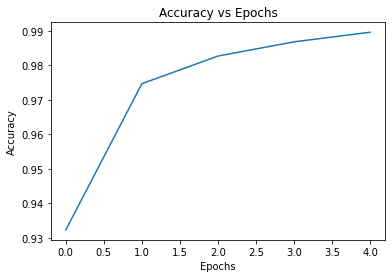

In [13]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

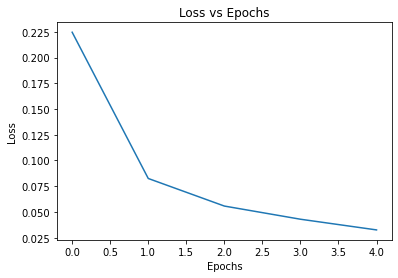

In [14]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

**Step 05.** Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [15]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy= model.evaluate(scaled_test_images, test_labels)
    
    return (test_loss, test_accuracy)
    

In [16]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.9805
Test loss: 0.06186743825674057
Test accuracy: 0.9804999828338623


**Step 06.** Make predictions  

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

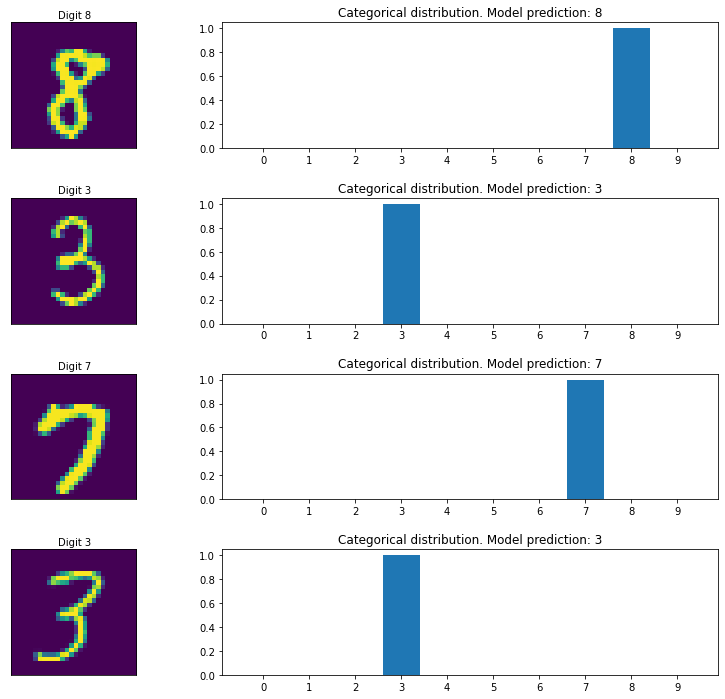

In [17]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

Congratulations for completing this programming assignment! In the next week of the course we will take a look at including validation and regularisation in our model training, and introduce Keras callbacks.

**Step 07.** ***Iterations***    

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0262 - accuracy: 0.9914
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0219 - accuracy: 0.9926
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0132 - accuracy: 0.9957
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0120 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0096 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.094

<Figure size 432x288 with 0 Axes>

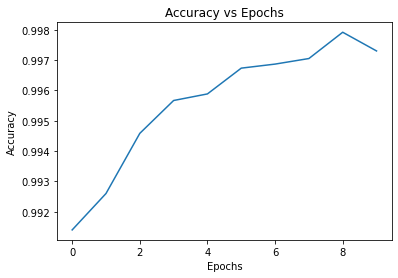

<Figure size 432x288 with 0 Axes>

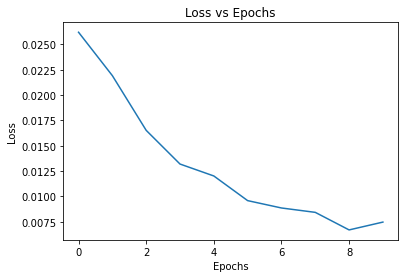

In [18]:
# Increase # epochs
epoch2= 10
history2 = model.fit(scaled_train_images, train_labels, epochs=epoch2)

frame2 = pd.DataFrame(history2.history)

plt.figure()
acc_plot2 = frame2.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot2.set(xlabel="Epochs", ylabel="Accuracy")

plt.figure()
loss_plot2 = frame2.plot(y="loss", title = "Loss vs Epochs",legend=False)
loss_plot2.set(xlabel="Epochs", ylabel="Loss")

test_loss2, test_accuracy2 = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss2}")
print(f"Test accuracy: {test_accuracy2}")

In [19]:
# Add Dropout layer
def get_model2(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model= tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(8, (3,3), padding= 'SAME', activation='relu', input_shape= input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(10, activation= 'softmax'))
    return model

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3198 - accuracy: 0.9013
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1430 - accuracy: 0.9554
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1130 - accuracy: 0.9643
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0946 - accuracy: 0.9697
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0458 - accuracy: 0.9853
Test loss: 0.04581921547651291
Test accuracy: 0.9853000044822693


<Figure size 432x288 with 0 Axes>

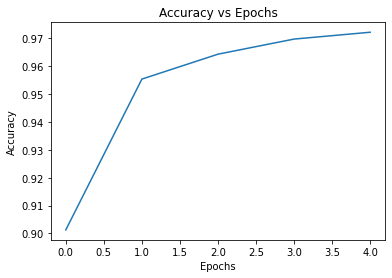

<Figure size 432x288 with 0 Axes>

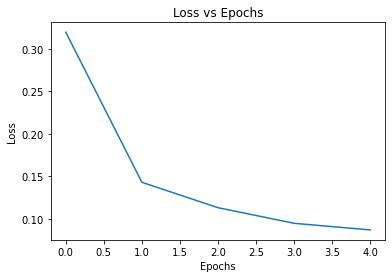

In [20]:
model2= get_model2(scaled_train_images[0].shape)
model2.compile(optimizer= 'adam',
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics= ['accuracy'])

history3 = model2.fit(scaled_train_images, train_labels, epochs=5)

frame3 = pd.DataFrame(history3.history)

plt.figure()
acc_plot3 = frame3.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot3.set(xlabel="Epochs", ylabel="Accuracy")

plt.figure()
loss_plot3 = frame3.plot(y="loss", title = "Loss vs Epochs",legend=False)
loss_plot3.set(xlabel="Epochs", ylabel="Loss")

test_loss3, test_accuracy3 = evaluate_model(model2, scaled_test_images, test_labels)
print(f"Test loss: {test_loss3}")
print(f"Test accuracy: {test_accuracy3}")

In [21]:
# Build smaller model
def get_model3(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model= tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(8, (3,3), padding= 'SAME', activation='relu', input_shape= input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(32, activation= 'relu'))
    model.add(tf.keras.layers.Dense(32, activation= 'relu'))
    model.add(tf.keras.layers.Dense(10, activation= 'softmax'))
    return model

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2886 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1105 - accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0725 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9811
Test loss: 0.060485947877168655
Test accuracy: 0.9811000227928162


<Figure size 432x288 with 0 Axes>

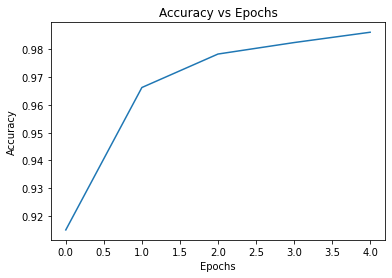

<Figure size 432x288 with 0 Axes>

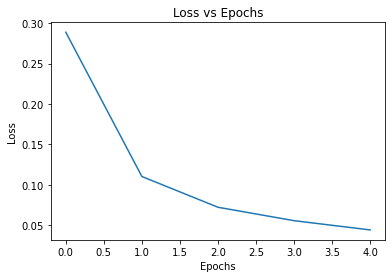

In [22]:
model3= get_model3(scaled_train_images[0].shape)
model3.compile(optimizer= 'adam',
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics= ['accuracy'])

history4 = model3.fit(scaled_train_images, train_labels, epochs=5)

frame4 = pd.DataFrame(history4.history)

plt.figure()
acc_plot4 = frame4.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot4.set(xlabel="Epochs", ylabel="Accuracy")

plt.figure()
loss_plot4 = frame4.plot(y="loss", title = "Loss vs Epochs",legend=False)
loss_plot4.set(xlabel="Epochs", ylabel="Loss")

test_loss4, test_accuracy4 = evaluate_model(model3, scaled_test_images, test_labels)
print(f"Test loss: {test_loss4}")
print(f"Test accuracy: {test_accuracy4}")

In [23]:
# Build smaller model
def get_model4(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model= tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(8, (3,3), padding= 'valid', activation='relu', input_shape= input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(64, activation= 'relu'))
    model.add(tf.keras.layers.Dense(10, activation= 'softmax'))
    return model

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2300 - accuracy: 0.9302
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0807 - accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0568 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0442 - accuracy: 0.9861
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0557 - accuracy: 0.9821
Test loss: 0.0556570328772068
Test accuracy: 0.9821000099182129


<Figure size 432x288 with 0 Axes>

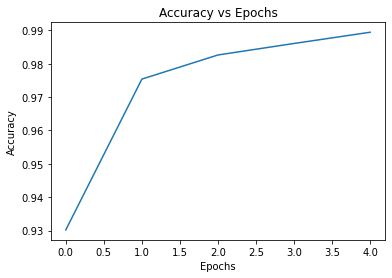

<Figure size 432x288 with 0 Axes>

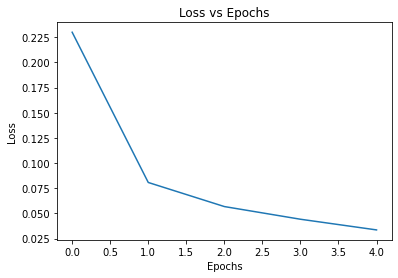

In [24]:
# Change padding type (no padding)
model4= get_model4(scaled_train_images[0].shape)
model4.compile(optimizer= 'adam',
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics= ['accuracy'])

history5 = model4.fit(scaled_train_images, train_labels, epochs=5)

frame5 = pd.DataFrame(history5.history)

plt.figure()
acc_plot5 = frame5.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot5.set(xlabel="Epochs", ylabel="Accuracy")

plt.figure()
loss_plot5 = frame5.plot(y="loss", title = "Loss vs Epochs",legend=False)
loss_plot5.set(xlabel="Epochs", ylabel="Loss")

test_loss5, test_accuracy5 = evaluate_model(model4, scaled_test_images, test_labels)
print(f"Test loss: {test_loss5}")
print(f"Test accuracy: {test_accuracy5}")